# 스택(Stack)

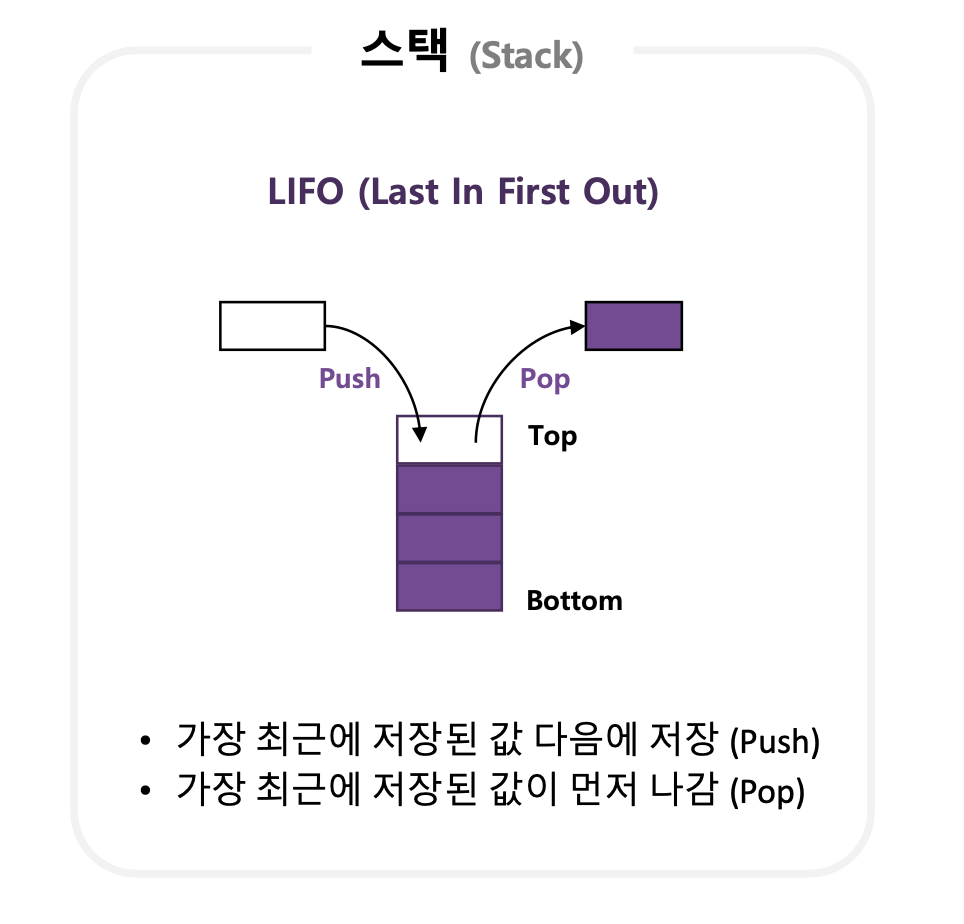

- 자료(data element)를 보관할 수 있는 (선형) 구조
- 단, 넣을 때는 한 쪽 끝에서만 밀어 넣어야 하고 꺼낼 때는 같은 쪽에서 뽑아 꺼내야 하는 제약이 있음
    - push(): 요소를 컬렉션에 추가한다.
    - pop(): 아직 제거되지 않은 가장 최근에 삽입된 요소를 제거한다.
- 후입선출(LIFO, Last-In First-Out)
- 파이썬은 스택 자료형을 별도로 지원하지 않지만, list를 통해 스택의 모든 연산을 수행할 수 있다.

*여담으로, 꽉 찬 스택에 요소를 삽입하고자 할 때, 스택에 요소가 넘쳐서 에러가 발생하는 것을 '스택 버퍼 오버플로'라고 부르며 개발자들이 애용하는 질의 응답 사이트인 '스택오버플로우'의 명칭이 여기서 유래했다.*

## 스택의 성질
1. 원소의 추가: O(1)
2. 원소의 제거: O(1)
3. 제일 상단의 원소 확인: O(1)
4. 제일 상단이 아닌 나머지 원소들의 확인/변경이 원칙적으로 불가능

## 스택의 추상적 자료구조 구현
**연산의 정의**
- size(): 현재 스택에 들어 있는 데이터 원소의 수를 구함
- isEmpty(): 현재 스택이 비어 있는 지를 판단
- push(x): 데이터 원소 x를 스택에 추가
- pop(): 스택의 맨 위에 저장된 데이터 원소를 제거하고 반환
- peek(): 스택의 맨 위에 저장된 데이터 원소를 반환(제거하지 않음)

In [6]:
# (1) 배열(array)를 이용해 구현 - python 리스트와 메서드들을 이용
class ArrayStack:
    def __init__(self): # 빈 스택을 초기화
        self.data = []
        
    def size(self): # 스택의 크기를 리턴
        return len(self.data)
    
    def isEmpty(self): # 스택이 비어 있는지 판단
        return self.size() == 0
    
    def push(self, item): # 데이터 원소를 추가
        self.data.append(item)
        
    def pop(self): # 데이터 원소를 삭제(리턴)
        return self.data.pop()
    
    def peek(self): # 스택의 꼭대기 원소 반환
        return self.data[-1]

---

In [122]:
# (2) 연결 리스트(linked list)를 이용해 구현 - 양방향 연결 리스트 이용
class Node:
    
    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None

class DoublyLinkedList:
    
    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None
    
    # 리스트 출력
    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'
        
        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s
    
    # 길이 리턴
    def getLength(self):
        return self.nodeCount
    
    # 리스트 순회
    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result
    
    # 리스트 역순회
    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result
    
    # 특정 원소 참조
    def getAt(self, pos): # getAt(0) -> head
        if pos < 0 or pos > self.nodeCount:
            return None
        
        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1
                
        return curr
    
    # 원소의 삽입
    def insertAfter(self, prev, newNode): # prev가 가리키는 node의 다음에 newNode를 삽입하고 성공/실패에 따라 True/False를 리턴
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True
    
    def insertBefore(self, next, newNode):
        prev = next.prev
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True
    
    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False
        prev = self.getAt(pos-1) # newNode가 삽입될 위치
        return self.insertAfter(prev, newNode)
    
    # 원소의 삭제
    def popAfter(self, prev): # prev의 다음 node를 삭제하고, 그 node의 data를 리턴
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data
    
    def popBefore(self, next): # next의 이전에 있던 node를 삭제하고, 그 node의 data를 리턴
        curr = next.prev
        prev = curr.prev
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data
    
    def popAt(self, pos): # pos에 의해 지정되는 node를 삭제하고, 그 node의 data를 리턴
        if pos < 1 or pos > self.nodeCount:
            raise IndexError
        prev = self.getAt(pos-1)
        return self.popAfter(prev)
        
    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail
        self.nodeCount += L.nodeCount

class LinkedListStack:

    def __init__(self):
        self.data = DoublyLinkedList()

    def size(self): # 스택의 크기를 리턴
        return self.data.getLength()

    def isEmpty(self): # 비어 있으면 True, 원소가 있으면 False 리턴
        return self.size() == 0 

    def push(self, item): # 데이터 원소를 추가
        node = Node(item)
        self.data.insertAt(self.size() + 1, node) # 맨 뒤 노드에 추가

    def pop(self): # 데이터 원소를 삭제(리턴)
        return self.data.popAt(self.size()) # 맨 뒤 노드(Top)를 리턴

    def peek(self): # 스택의 꼭대기 원소 반환
        return self.data.getAt(self.size()).data # 맨 뒤 노드(Top) 반환

## collections 모듈의 deque()을 사용

In [13]:
from collections import deque


stack = deque()

# push 연산
stack.append(1)
stack.append(2)
stack.append(3)
print(stack)

# size 연산
print(f"스택의 크기: {len(stack)}")

# isEmpty 연산
print(True if not stack else False)

# pop 연산
x = stack.pop()
print(f"stack의 top에 위치한 {x} 제거 후, 스택: {stack}")

# peek 연산
print(f"스택의 top: {stack[-1]}")

deque([1, 2, 3])
스택의 크기: 3
False
stack의 top에 위치한 3 제거 후, 스택: deque([1, 2])
스택의 top: 2


## 스택의 응용 - 수식의 후위 표기법

### 중위 표기법 (infix notation)
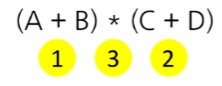
- 일상에서 사용하는 수식의 표기법
- 연산자가 피연산자들의 사이에 위치

### 후위 표기법(postfix notation)
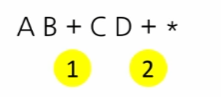
- 연산자가 피연산자들의 뒤에 위치
- 이렇게 수식을 후위 표기법으로 표기하면, 컴퓨터가 (프로그램이) 수식을 계산하는 데 유리 (편안) 해진다. 왼쪽부터 수식을 읽으면서 연산자를 만날 때마다 두 피연산자에 그 셈을 적용하면 되기 때문이며, 이 때 스택이 이용된다.

### 중위 표현식 -> 후위 표현식
예시 1) $ A * B + C -> A B * C + $
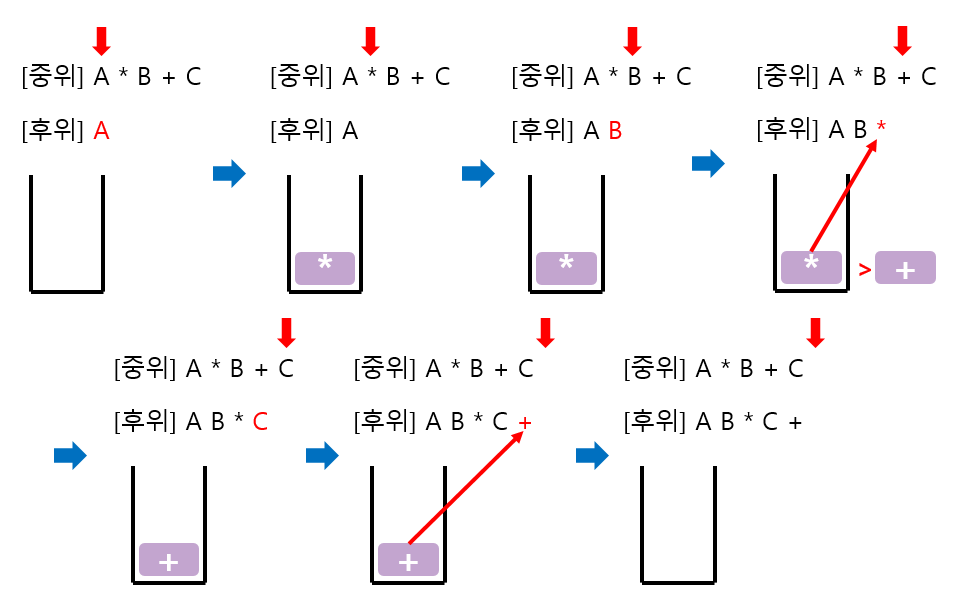

예시 2) $ A + B * C -> A B C * + $
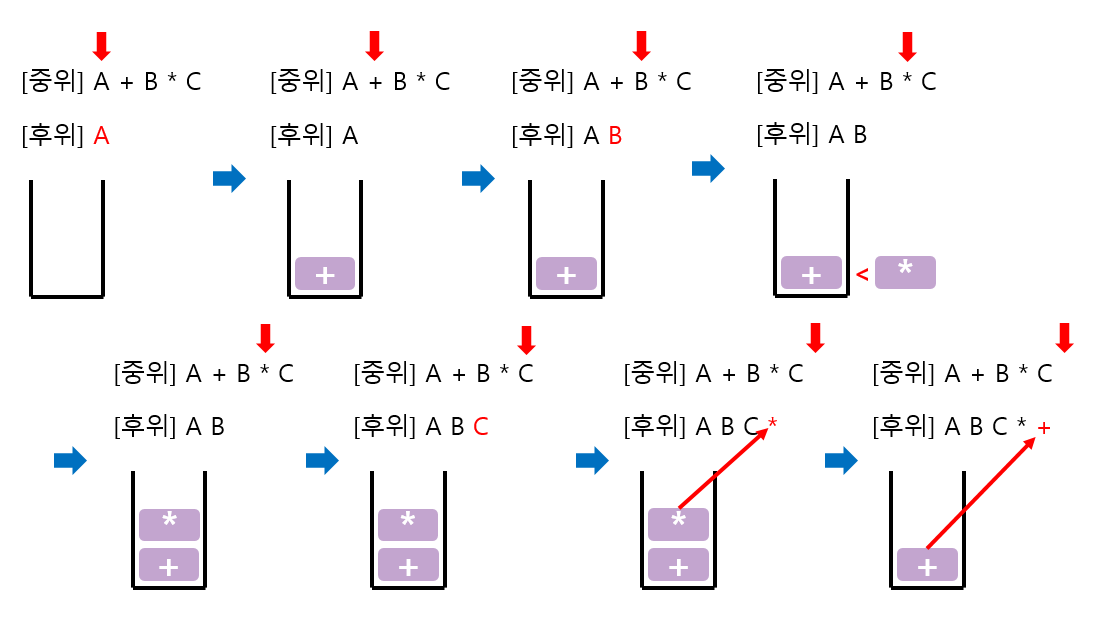

이미지 출처: <https://velog.io/@inyong_pang/12%EA%B0%95-%EC%8A%A4%ED%83%9D%EC%9D%98-%EC%9D%91%EC%9A%A9-%EC%88%98%EC%8B%9D%EC%9D%98-%ED%9B%84%EC%9C%84-%ED%91%9C%EA%B8%B0%EB%B2%95Postfix-Notation>

# 큐(Queue)

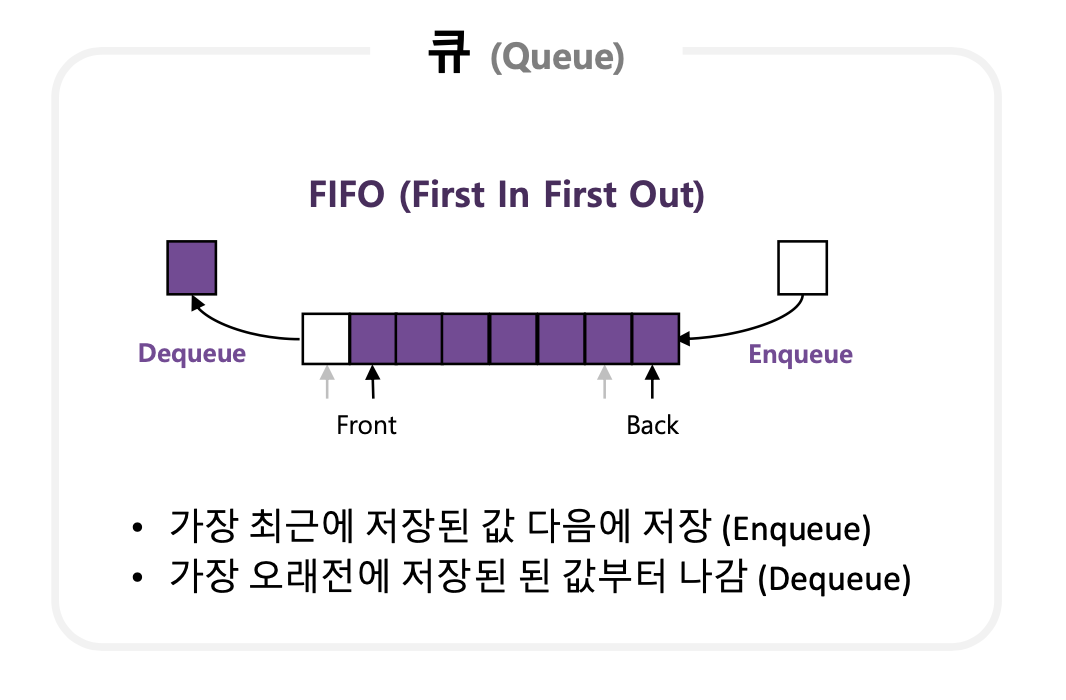
- 자료(data element)를 보관할 수 있는 선형 구조
- 단, 넣을 때는 한 쪽 끝에서 밀어 넣어야 하고, 꺼낼 때는 반대 쪽에서 뽑아 꺼내야 하는 제약이 있음
    - enqueue(): 요소를 컬렉션에 추가한다.
    - dequeue(): 가장 먼저 추가된 요소를 제거한다.
- 선입선출(FIFO, First-In First-Out)
- 파이썬은 큐 자료형을 별도로 지원하지 않지만, 스택과 마찬가지로 list를 통해 큐의 모든 연산을 수행할 수 있다.
- **하지만, 파이썬의 list는 dynamic array로 구현돼있어 큐의 연산을 수행하는데 효율적이지 않기 때문에, collections 모듈의 deque을 사용하는 것이 효율적이다.** (https://stackoverflow.com/questions/32543608/deque-popleft-and-list-pop0-is-there-performance-difference)
    - list의 pop(0)을 통해 enqueue연산을 수행하면 O(N)이 걸림 (dynamic arrays는 데이터를 추가, 삭제할 때 뒤에 있는 데이터들을 모두 한 칸씩 shift 해줘야 하기 때문이다.)
    - deque의 popleft()을 통해 맨 앞에 원소를 제거하는 enqueue연산 수행은 O(1)이 걸림(deque이 double linked list로 구성돼있기 때문이다. 양방향 연결 리스트에서 맨 앞과 맨 뒤의 노드 삭제 연산의 수행시간은 O(1))

## 큐의 성질
1. 원소의 추가: O(1)
2. 원소의 제거: O(1)
3. 제일 상단의 원소 확인: O(1)
4. 제일 상단이 아닌 나머지 원소들의 확인/변경이 원칙적으로 불가능

## 큐의 추상적 자료구조 구현
**연산의 정의**
- size(): 현재 큐에 들어 있는 데이터 원소의 수를 구함
- isEmpty(): 현재 큐가 비어 있는 지를 판단
- enqueue(x): 데이터 원소 x를 큐에 추가
- dequeue(): 큐의 맨 앞에 저장된 데이터 원소를 제거하고 반환
- peek(): 큐의 맨 앞에 저장된 데이터 원소를 반환(제거하지 않음)

In [18]:
# (1) 배열(array)을 이용해 구현 - python 리스트와 메서들을 이용
class ArrayQueue:
    
    def __init__(self): # 빈 큐를 초기화
        self.data = []
        
    def size(self): # 큐의 크기를 리턴 - O(1)
        return len(self.data)
    
    def isEmpty(self): # 큐가 비어 있는지 판단 - O(1)
        return self.size() == 0
    
    def enqueue(self, item): # 데이터 원소를 추가 - O(1)
        self.data.append(item)
        
    def dequeue(self): # 데이터 원소를 삭제(리턴) - O(N)
        return self.data.pop(0) 
    
    def peek(self): # 큐의 맨 앞 원소 반환 - O(1)
        return self.data[0]

In [21]:
# (2) 연결 리스트(linked list)를 이용해 구현 - 양방향 연결 리스트 이용
class Node:

    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None


class DoublyLinkedList:

    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None


    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'

        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s


    def getLength(self):
        return self.nodeCount


    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result


    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result


    def getAt(self, pos):
        if pos < 0 or pos > self.nodeCount:
            return None

        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1

        return curr


    def insertAfter(self, prev, newNode):
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True


    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False

        prev = self.getAt(pos - 1)
        return self.insertAfter(prev, newNode)


    def popAfter(self, prev):
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data


    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError('Index out of range')

        prev = self.getAt(pos - 1)
        return self.popAfter(prev)


    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail

        self.nodeCount += L.nodeCount


class LinkedListQueue:

    def __init__(self):
        self.data = DoublyLinkedList()

    def size(self):
        return self.data.nodeCount

    def isEmpty(self):
        return self.data.nodeCount==0

    def enqueue(self, item):
        node = Node(item)
        self.data.insertAt(self.size()+1,node)

    def dequeue(self):
        return self.data.popAt(1)

    def peek(self):
        return self.data.head.next.data

## collections 모듈의 deque()을 사용

In [20]:
from collections import deque

q = deque()

# enqueue 연산
q.append(1)
q.append(2)
q.append(3)
print(q)

# size 연산
print(f"큐의 크기: {len(q)}")

# isEmpty 연산
print(True if not q else False)

# dequeue 연산
x = q.popleft()
print(f"queue의 front에 위치한 {x} 제거 후, 큐: {q}")

# peek 연산
print(f"큐의 front: {q[0]}")

deque([1, 2, 3])
큐의 크기: 3
False
queue의 front에 위치한 1 제거 후, 큐: deque([2, 3])
큐의 front: 2


# 원형 큐(Circular Queue)

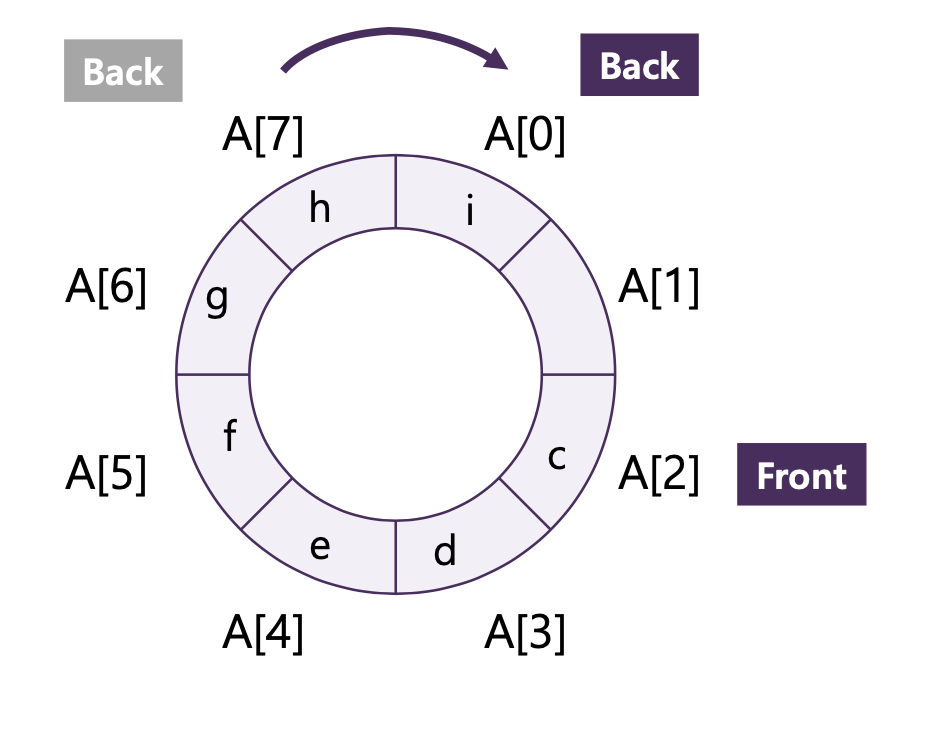

# 우선순위 큐(Priority Queues)

큐가 FIFO(First-In First-Out) 방식을 따르지 않고 원소들의 어떠한 특정 조건에 따라 **우선순위**가 가장 높은 요소가 추출되는 자료형

- 운영체제의 CPU 스케줄러에 활용된다.
- 파이썬에서는 우선순위 큐가 필요할 때 PriorityQueue 또는 heapq를 사용할 수 있는데, 일반적으로 heapq가 더 빠르게 동작하기 때문에 수행 시간이 제한된 상황에서는 <u>heapq를 사용하는 것을 권장</u>한다.
- 우선순위 값을 표현할 때는 일반적으로 정수형 자료형의 변수가 사용된다.
- 파이썬의 경우, heapq 라이브러리에서 기본적으로 **최소힙** 구조를 이용하는데 최소힙을 최대힙처럼 사용하기 위해서 일부러 우선순위에 해당하는 값에 음수 부호(-)를 붙여서 넣었다가, 나중에 우선순위 큐에서 꺼낸 다음에 다시 음수 부호(-)를 붙여서 원래의 값으로 돌리는 방식을 사용할 수 있다.

## 우선순위 큐의 구현
1) Enqueue할 때 우선순위 순서를 유지하는 방식\
2) Dequeue할 때 우선순위 높은 것을 선택하는 방식

→ 두 가지 방식이 가능하지만, 1번 방식이 시간적인 측면에서 유리하다고 할 수 있다. \
만약 큐에 우선순위의 순서가 유지되지 않은 채 원소들이 들어있다면, 2번 방식으로 Dequeue할 때 매번 모든 원소들의 우선순위를 확인해야하기 때문에 큐의 길이만큼 시간이 걸린다. 하지만 1번 방식이라면 매번 모든 원소를 살펴볼 필요가 없다.(항상 우선순위 순서를 유지하고 있기 때문에)

두 가지 자료형으로 우선순위 큐를 구현할 수 있다.
- 선형 배열
- 연결 리스트

→ 시간적으로 볼 때, 연결 리스트가 유리하다. Enqueue를 할 때 원소를 우선순위에 따라 순서를 유지하기 때문에 중간에 원소를 삽입하는 경우가 많기 때문이다. 선형 배열은 중간에 원소가 삽입되면 해당 원소의 뒤에 있는 원소를 모두 뒤로 밀어야 하기 때문에 O(n)의 시간복잡도가 걸린다. 하지만, 공간 복잡도 측면에서는 선형 배열이 더 유리하다고 볼 수 있다.

In [1]:
class Node:

    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None


class DoublyLinkedList: # 양방향 연결 리스트

    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None


    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'

        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s


    def getLength(self):
        return self.nodeCount


    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result


    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result


    def getAt(self, pos):
        if pos < 0 or pos > self.nodeCount:
            return None

        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1

        return curr


    def insertAfter(self, prev, newNode):
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True


    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False

        prev = self.getAt(pos - 1)
        return self.insertAfter(prev, newNode)


    def popAfter(self, prev):
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data


    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            return None

        prev = self.getAt(pos - 1)
        return self.popAfter(prev)


    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail

        self.nodeCount += L.nodeCount


class PriorityQueue:

    def __init__(self):
        self.queue = DoublyLinkedList()


    def size(self):
        return self.queue.getLength()

    def isEmpty(self):
        return self.size() == 0

    def enqueue(self, x):
        newNode = Node(x)
        curr = self.queue.head
        while curr.next != self.queue.tail and x < curr.next.data: # 아직 끝까지 가지 않았음 & 우선순위 비교
            curr = curr.next
        self.queue.insertAfter(curr, newNode)

    def dequeue(self):
        return self.queue.popAt(self.queue.getLength())

    def peek(self):
        return self.queue.getAt(self.queue.getLength()).data


def solution(x):
    return 0

# 덱(Deque)
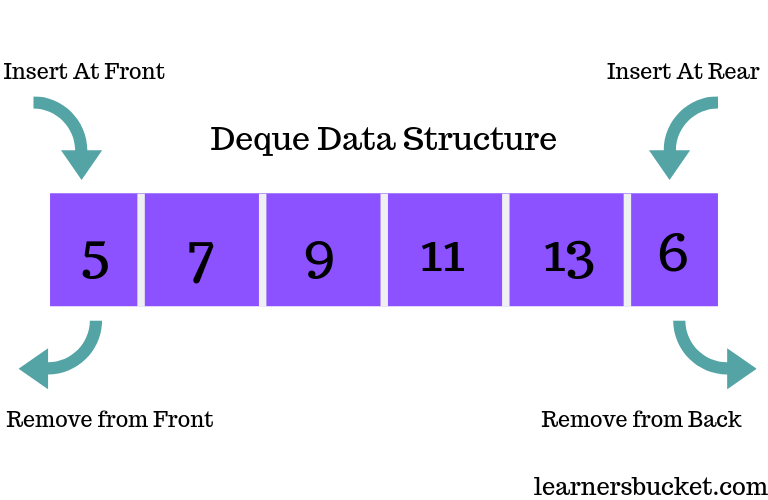

## 덱의 성질
1. 원소의 추가: O(1)
2. 원소의 제거: O(1)
3. 제일 상단의 원소 확인: O(1)
4. 제일 상단이 아닌 나머지 원소들의 확인/변경이 원칙적으로 불가능
(collections 모듈의 deque에서는 가능)

## 덱의 추상적 자료구조 구현
**연산의 정의**

- push_front(x): 원소 x를 덱의 앞에 넣는다.
- push_back(x): 원소 x를 덱의 뒤에 넣는다.
- pop_front(): 덱의 가장 앞에 있는 원소를 빼고, 그 원소를 반환한다. 만약, 덱에 들어있는 원소가 없는 경우에는 -1을 반환한다.
- pop_back(): 덱의 가장 뒤에 있는 원소를 빼고, 그 원소를 반환한다. 만약, 덱에 들어있는 원소가 없는 경우에는 -1을 반환한다.
- size(): 덱에 들어있는 원소의 개수를 반환한다.
- isEmpty(): 덱이 비어있으면 1을, 아니면 0을 반환한다.
- front(): 덱의 가장 앞에 있는 원소를 반환한다. 만약 덱에 들어있는 원소가 없는 경우에는 -1을 반환한다.
- back(): 덱의 가장 뒤에 있는 원소를 반환한다. 만약 덱에 들어있는 원소가 없는 경우에는 -1을 반환한다.

In [118]:
# (1) 배열(array)를 이용해 구현 - python 리스트와 메서드들을 이용
# head: 가장 앞에 있는 원소의 인덱스
# tail: 가장 뒤에 있는 원소의 인덱스 + 1
# head와 tail의 초기값은 MX, 배열의 크기: 2*MX+1
# -> 덱은 스택, 큐와 달리 양쪽에서 삽입이 가능하기 때문에 양쪽으로 확장하려면 시작점을 배열의 중간으로 둬야 한다.

class ArrayDeque:
    def __init__(self): # 빈 덱 초기화
        MX = 1000005 # 배열의 중간
        self.dat = [False] * (2*MX+1) # 임의로 설정한 배열의 크기
        self.head = MX
        self.tail = MX
        
    def push_front(self, x): # 원소 x를 덱의 앞에 추가
        self.dat[self.head-1] = x
        self.head -= 1

    def push_back(self, x): # 원소 x를 덱의 뒤에 추가
        self.dat[self.tail] = x
        self.tail += 1

    def pop_front(self): # 덱의 가장 앞에 있는 원소를 제거, 반환
        if self.head == self.tail: # 덱이 비어있음
            return -1
        self.head += 1
        return dat[self.head-1] # 여기서 굳이 제거해 줄 필요가 없는 이유는 이후에 다른 원소로 채워지게 되면 덮어씌우면 되기 때문

    def pop_back(self): # 덱의 가장 뒤에 있는 원소를 제거, 반환
        if self.head == self.tail:
            return -1
        self.tail -= 1
        return dat[self.tail+1]
    
    def size(self): # 덱의 원소의 개수를 반환
        return self.tail - self.head

    def isEmpty(self): # 덱이 비어있으면 1, 아니면 0
        if self.head == self.tail:
            return 1
        else:
            return 0
    
    def front(self): # 덱의 가장 앞에 있는 원소를 반환
        return self.dat[self.head]

    def back(self): # 덱의 가장 뒤에 있는 원소를 반환
        return self.dat[self.tail-1]

In [176]:
# (2) 연결 리스트(linked list)를 이용해 구현 - 양방향 연결 리스트 이용
class Node:

    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None


class DoublyLinkedList:

    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None


    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'

        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s


    def getLength(self):
        return self.nodeCount


    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result


    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result


    def getAt(self, pos):
        if pos < 0 or pos > self.nodeCount:
            return None

        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1

        return curr


    def insertAfter(self, prev, newNode):
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True


    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False

        prev = self.getAt(pos - 1)
        return self.insertAfter(prev, newNode)


    def popAfter(self, prev):
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data


    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError('Index out of range')

        prev = self.getAt(pos - 1)
        return self.popAfter(prev)


    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail

        self.nodeCount += L.nodeCount


class LinkedListDeque:

    def __init__(self):
        self.data = DoublyLinkedList()

    def size(self):
        return self.data.nodeCount

    def isEmpty(self):
        return self.data.nodeCount==0
    
    def push_front(self, item): # 덱의 앞에 원소 추가
        node = Node(item)
        self.data.insertAt(1, node)

    def push_back(self, item): # 덱의 뒤에 원소 추가
        node = Node(item)
        self.data.insertAt(self.size()+1,node)

    def pop_front(self): # 맨 앞 노드(head)를 제거, 리턴
        return self.data.popAt(1)
    
    def pop_back(self): # 맨 뒤 노드(tail)를 제거, 리턴
        return self.data.popAt(self.size()) 

    def front(self): # 덱의 가장 앞에 있는 원소 반환
        return self.data.head.next.data
    
    def back(self): # 덱의 가장 뒤에 있는 원소 반환
        return self.data.tail.prev.data

In [177]:
dq = LinkedListDeque()

In [178]:
dq.push_back(1)
dq.push_back(2)
dq.data

1 -> 2

In [179]:
dq.push_front(3)

In [181]:
dq.data

3 -> 1 -> 2

In [182]:
dq.pop_back()

2

In [183]:
dq.data

3 -> 1

In [184]:
dq.pop_front()

3

In [187]:
dq.isEmpty()

False

In [191]:
dq.size(), dq.data

(1, 1)

## collections 모듈의 deque()을 사용

In [194]:
from collections import deque

q = deque()

# push_back 연산
q.append(1)
q.append(2)
print(q)

# push_front 연산
q.appendleft(4)
print(q)

# size 연산
print(f"덱의 크기: {len(q)}")

# isEmpty 연산
print(True if not q else False)

# pop_back 연산
x = q.pop()
print(f"deque의 tail에 위치한 {x} 제거 후, 덱: {q}")

# pop_front 연산
x = q.popleft()
print(f"deque의 head에 위치한 {x} 제거 후, 덱: {q}")

deque([1, 2])
deque([4, 1, 2])
덱의 크기: 3
False
deque의 tail에 위치한 2 제거 후, 덱: deque([4, 1])
deque의 head에 위치한 4 제거 후, 덱: deque([1])
